## Data input

In [89]:
# importing panda library
import pandas as pd
import numpy as np
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
  
# readinag given file
# and creating dataframe
seeds = pd.read_csv("seeds_dataset.txt", header = None, delimiter=r"\s+")

# adding column headings
seeds.columns = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 
                 'asymmetry coefficient', 'length of kernel groove', 'wheat kind']
  
# storing this dataframe in a csv file
seeds.to_csv('seeds.csv', index = None)

# read from csv file
seeds = pd.read_csv("seeds.csv")


In [90]:
seeds.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,wheat kind
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Data preprocessing

In [91]:
# Transform data format and shape so your model can process them
################## Maybe do something here ########################


########################### END ##########################

# Shuffle the data
seeds = seeds.sample(frac=1)

# Any other transformation boosts the final performance
################## Maybe do something here ########################


########################### END ##########################

seeds.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,wheat kind
36,16.20,15.27,0.8734,5.826,3.464,2.8230,5.527,1
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,1
38,14.80,14.52,0.8823,5.656,3.288,3.1120,5.309,1
19,12.72,13.57,0.8686,5.226,3.049,4.1020,4.914,1
158,11.75,13.52,0.8082,5.444,2.678,4.3780,5.310,3


## Model construction: K-means Clustering

In [92]:
seeds_data = seeds.drop('wheat kind', axis = 1)
seeds_class = seeds['wheat kind']

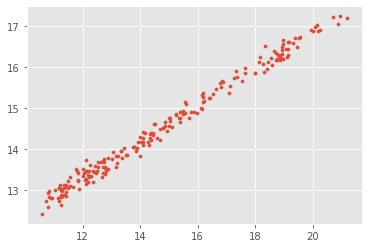

In [93]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

X = np.array(seeds_data)

plt.scatter(X[:,0], X[:,1], s=10)
plt.show()

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist 

class K_Means:
    def __init__(self, k=3):
        self.k = k

    def fit(self,data):

        self.centroids = []
        
        # Randomly initial k centers C={c1, ..., ck}
        for i in range(self.k):
            self.centroids.append(data[i])
        
        # assignment step: 
        distances = cdist(data, self.centroids ,'euclidean')
        self.classifications = np.array([np.argmin(i) for i in distances])

        # Revise the centroid until there's no changes
        while(True):
            prev_centroids = self.centroids
            self.centroids = []

            # update step:
            for idx in range(self.k):
                temp_cent = data[self.classifications==idx].mean(axis=0) 
                self.centroids.append(temp_cent)
            
            self.centroids = np.vstack(self.centroids) # updated centroids
                
            distances = cdist(data, self.centroids ,'euclidean')
            self.classifications = np.array([np.argmin(i) for i in distances])
            
            # check whether optimized
            same_centroids = True
            prev_centroids = np.array(prev_centroids)

            for c in range(self.centroids.shape[0]):
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > 0.001:
                    same_centroids = False

            if same_centroids:
                break

    def predict(self,data):
        distances = cdist(data, self.centroids ,'euclidean')
        classification = np.array([np.argmin(i) for i in distances])
        return classification


X = np.array(seeds_data)
y = np.array(seeds_class)


clf = K_Means()
clf.fit(X)

In [95]:
y = np.vstack(y)
seeds_after_clustering = np.concatenate([X, y], axis = 1)
classifications = np.vstack(clf.classifications)
seeds_after_clustering = np.concatenate([seeds_after_clustering, classifications], axis = 1)

seeds_after_clustering = pd.DataFrame(seeds_after_clustering)
seeds_after_clustering.columns = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 
                                  'asymmetry coefficient', 'length of kernel groove', 'wheat kind', 'clustering group']

seeds_after_clustering

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,wheat kind,clustering group
0,16.20,15.27,0.8734,5.826,3.464,2.8230,5.527,1.0,1.0
1,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,1.0,1.0
2,14.80,14.52,0.8823,5.656,3.288,3.1120,5.309,1.0,1.0
3,12.72,13.57,0.8686,5.226,3.049,4.1020,4.914,1.0,2.0
4,11.75,13.52,0.8082,5.444,2.678,4.3780,5.310,3.0,2.0
...,...,...,...,...,...,...,...,...,...
205,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1.0,1.0
206,19.18,16.63,0.8717,6.369,3.681,3.3570,6.229,2.0,0.0
207,18.45,16.12,0.8921,6.107,3.769,2.2350,5.794,2.0,0.0
208,13.16,13.55,0.9009,5.138,3.201,2.4610,4.783,1.0,1.0


In [96]:
group_0 = seeds_after_clustering.loc[seeds_after_clustering['clustering group'] == 0]
group_1 = seeds_after_clustering.loc[seeds_after_clustering['clustering group'] == 1]
group_2 = seeds_after_clustering.loc[seeds_after_clustering['clustering group'] == 2]

In [97]:
# calculate each label to relabel
change0to = 0
label0_1 = len(group_0[group_0['wheat kind'] == 1])
label0_2 = len(group_0[group_0['wheat kind'] == 2])
label0_3 = len(group_0[group_0['wheat kind'] == 3])

var = {label0_1:"label_1",label0_2:"label_2",label0_3:"label_3"}

if(var.get(max(var)) == 'label_1'):
    change0to = 1
elif(var.get(max(var)) == 'label_2'):
    change0to = 2
elif(var.get(max(var)) == 'label_3'):
    change0to = 3

print(change0to)

change1to = 0
label1_1 = len(group_1[group_1['wheat kind'] == 1])
label1_2 = len(group_1[group_1['wheat kind'] == 2])
label1_3 = len(group_1[group_1['wheat kind'] == 3])

var = {label1_1:"label_1",label1_2:"label_2",label1_3:"label_3"}

if(var.get(max(var)) == 'label_1'):
    change1to = 1
elif(var.get(max(var)) == 'label_2'):
    change1to = 2
elif(var.get(max(var)) == 'label_3'):
    change1to = 3

print(change1to)

change2to = 0
label2_1 = len(group_2[group_2['wheat kind'] == 1])
label2_2 = len(group_2[group_2['wheat kind'] == 2])
label2_3 = len(group_2[group_2['wheat kind'] == 3])

var = {label2_1:"label_1",label2_2:"label_2",label2_3:"label_3"}

if(var.get(max(var)) == 'label_1'):
    change2to = 1
elif(var.get(max(var)) == 'label_2'):
    change2to = 2
elif(var.get(max(var)) == 'label_3'):
    change2to = 3

print(change2to)

2
1
3


### - Results

In [98]:
prediction_list = []
for i in range(len(X)):

    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    #print(predict_me)
    prediction = clf.predict(predict_me)
    if(prediction == 0):
        prediction = change0to
    elif(prediction == 1):
        prediction = change1to
    elif(prediction == 2):
        prediction = change2to
        
    prediction_list.append(prediction)

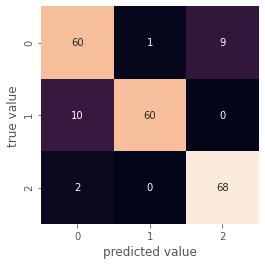

+------------+----------+-------------+
|   accuracy |   recall |   precision |
+============+==========+=============+
|   0.895238 | 0.895238 |    0.900019 |
+------------+----------+-------------+


In [99]:
# import lib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from tabulate import tabulate

y_predict = prediction_list
y_test = y

# results: confusion matrix
mat1 = confusion_matrix(y_test, y_predict)
sns.heatmap(mat1,square= True, annot=True, cbar= False)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

# results: accuracy
accuracy = accuracy_score(y_test, y_predict)

# results: sensitivity(recall)
recall = recall_score(y_test, y_predict, average='macro')

# results: precision
precision = precision_score(y_test, y_predict, average='macro')

# draw table with accuracy, recall, precision
data = [[accuracy, recall, precision]]

headers = ["accuracy", "recall", "precision"]

print(tabulate(data, headers= headers, tablefmt= "grid"))